<a href="https://colab.research.google.com/github/priyasiddharth/mbedtls-ownsem/blob/main/mbedtls_ownsem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data from github repo. Each file contains data for one benchmark. Therefore dump all data in one dictionary.

In [5]:
import requests
import json

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pdb
def load_dict_with_tuple_keys(data):
  original_dict = {tuple(eval(key)): value for key, value in data.items()}
  return original_dict

urls = {
    'many_buffers': 'https://raw.githubusercontent.com/priyasiddharth/mbedtls-ownsem/main/result_many_buffers.json',
    'flight_append': 'https://raw.githubusercontent.com/priyasiddharth/mbedtls-ownsem/main/results_flight_append.json',
    'write_handshakes_main': 'https://raw.githubusercontent.com/priyasiddharth/mbedtls-ownsem/main/results_write_handshake_main.json',
    'write_handshakes_shad': 'https://raw.githubusercontent.com/priyasiddharth/mbedtls-ownsem/main/results_write_handshake_shad.json',
    'write_records': 'https://raw.githubusercontent.com/priyasiddharth/mbedtls-ownsem/main/results_write_records.json',
}

data = {}

for key, url in urls.items():
  response = requests.get(url)
  data[key] = load_dict_with_tuple_keys(response.json())


merged_data = []
keys = []
for key, value in data.items():
  merged_data.append(value)
  keys.append(key)

The following are helper functions to draw scatter plots of Baseline vs Ownsem.

In [14]:
def sorting_key(item):
    knobname, knobval, job, times = item[0]  # Extract the key from the item
    return job

def max_uptill(iterable, cutoff):
    max_value = None

    for num in iterable:
        if num > cutoff:
            break
        if max_value is None or num > max_value:
            max_value = num

    return max_value

def extract_data_pair(data, subkey, parameter):
    filtered = {job: v for (knobname, knobval, job, times), v in data.items() if knobval == subkey}
    x = 0
    y = 0
    for key in filtered.keys():
      try:
        if 'ownsem' in key:
          x = filtered[key][parameter]
        else:
          y = filtered[key][parameter]
      except KeyError:
        pdb.set_trace()
    return (x, y)

def extract_datalist(data, parameter):
    knob_range = {key[1] for key in data.keys()}
    data_pairs = [(extract_data_pair(data, knob, parameter)) for knob in knob_range]
    x = [item[0] for item in data_pairs]  # Extract first element of each tuple
    y = [item[1] for item in data_pairs]  # Extract second element of each tuple
    return (x, y)  # Return tuple

def scatter_plot(x, y, job_name):
    #df = pd.DataFrame({'ownsem': x, 'baseline': y})
    # Plot scatterplot with a unique marker style for each job
    marker_styles = ['o', '^', 's', 'd', 'x']  # You can extend this list for more job names
    plt.scatter(x, y, label=job_name, marker=marker_styles.pop(0))

def plot_lines(x, y):
    # Plot y=x line
    plt.plot(x, y, label='y = x', color='#FFB6C1') #pink

    # Plot y=3x line
    plt.plot(x, [3 * val for val in x], label='y = 3x', color='#98FB98') #green

def doPlot(data, parameter, job_names,usr_max_x,usr_max_y):
  max_x_value = 0
  max_y_value = 0
  # Iterate over job names and plot each file separately
  for job_name, json_data in zip(job_names, data):
    x, y = extract_datalist(json_data, parameter)
    scatter_plot(x, y, job_name)
    # Update maximum x and y values
    max_x_value = max_uptill([max_x_value, max(x)], usr_max_x)
    max_y_value = max_uptill([max_y_value, max(y)], usr_max_y)

  max_marker_size = plt.rcParams['lines.markersize']
  #Get the maximum value from both x and y and adjust plot
  max_value = max(max_x_value, max_y_value) + max_marker_size
  plt.xlim(0, max_value)
  plt.ylim(0, max_value)
  # Plot y=x and y=3x lines
  x_line = np.linspace(0, max_value, 100)
  plot_lines(x_line, x_line)
  # Add grid
  plt.grid(True)
  # Add labels
  plt.xlabel('Ownsem')
  plt.ylabel('Baseline')

  # Show legend
  plt.legend()
  #plt.savefig(out_filename, format='pdf')
  #print(f'Wrote file {out_filename}')
  plt.show()

**1. Solving time**

We want to evaluate time spent in SMT solver for Baseline vs Ownsem (in seconds).

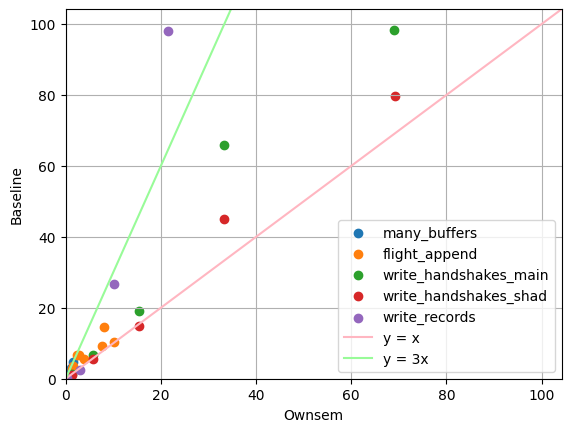

In [15]:
doPlot(merged_data, 'BMC.solve',keys, 100, 100)


**2. Number of SAT conflicts**

Here we cutoff the graph at x=y=32000 to remove outliers and *zoom* in on the data.


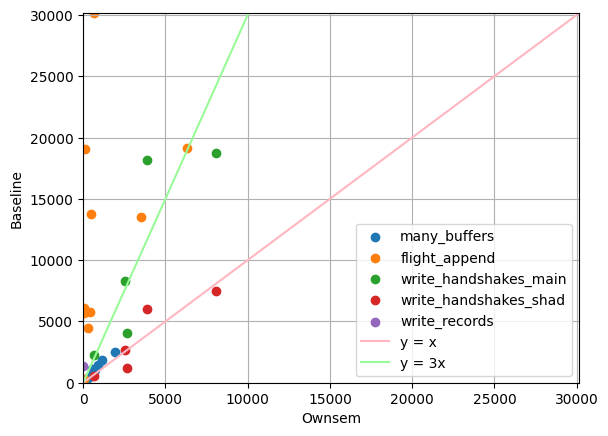

In [18]:
doPlot(data=merged_data, parameter='sat conflicts',job_names=keys, usr_max_x=32000, usr_max_y=32000)

**2. Number of SAT backjumps**

Here we cutoff the graph at x=y=27000 to remove outliers and *zoom* in on the data.


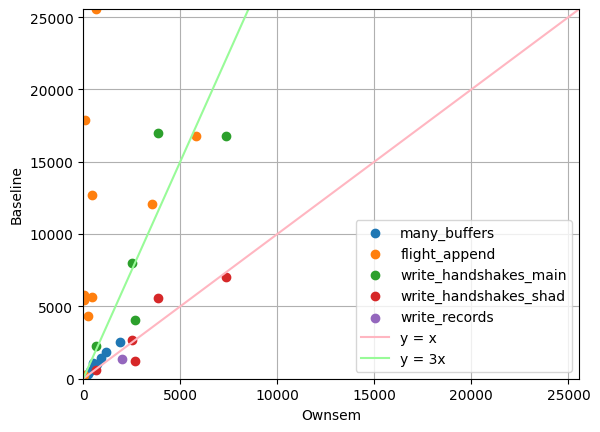

In [19]:
doPlot(data=merged_data, parameter='sat backjumps',job_names=keys, usr_max_x=27000, usr_max_y=27000)

You can choose to plot any of the following metrics.
1. "mk bool var"
2. "sat mk clause 2ary"
3. "sat mk clause 3ary"
4. "sat mk clause nary"
5. "sat mk var"
6. "sat del clause"
7. "sat conflicts"
8. "sat decisions"
9. "sat propagations 2ary"
10. "sat propagations 3ary"
11. "sat propagations nary"
12. "sat minimized lits"
13. "sat subs resolution dyn"
14. "sat units"
15. "sat backjumps"
16. "sat elim clauses"
17. "sat elim literals"
18. "smtfd-num-rounds"
19. "smtfd-num-fresh-bool"
20. "num allocs"
21. "rlimit count"
22. "max memory"
23. "memory"
24. "time"
25. "Result"
26. "bmc.circ_sz"
27. "bmc.dag_sz"
28. "opsem.load"
29. "BMC"
30. "BMC.solve"
31. "Control dependence analysis"
32. "Thinned Gate SSA transformation"
33. "opsem.assert"
34. "opsem.simplify"
35. "seahorn_total"